In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/balanceado/creditcard_2023.csv")

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     568630 non-nu

In [4]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categoricas ; ", cat_cols)

int_cols = [col for col in df.columns if col not in cat_cols]
print("Não categoricas ; ", int_cols)

Categoricas ;  Index([], dtype='str')
Não categoricas ;  ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [5]:
def Limites(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return upper, lower

In [6]:
out, norm = [], []

X = df.drop('Class', axis=1)
Y = df['Class']

for col in X.columns:
    sk = df[col].skew()
    print(f"Column [{col}] is {sk:.2f}", end = '\t')
    if sk > - 0.5 and sk < 0.5:
        print(f"{col} É simetrica")
        norm.append(col)
    elif sk > -1 and sk < -1:
        print(f"{col} +- simetrica")
        out.append(col)
    else:
        print(f"{col} É outlier")
        out.append(col)

Column [id] is -0.00	id É simetrica
Column [V1] is -0.08	V1 É simetrica
Column [V2] is -1.40	V2 É outlier
Column [V3] is 0.01	V3 É simetrica
Column [V4] is -0.04	V4 É simetrica
Column [V5] is 1.51	V5 É outlier
Column [V6] is -0.20	V6 É simetrica
Column [V7] is 19.03	V7 É outlier
Column [V8] is 0.30	V8 É simetrica
Column [V9] is 0.17	V9 É simetrica
Column [V10] is 0.74	V10 É outlier
Column [V11] is -0.02	V11 É simetrica
Column [V12] is 0.07	V12 É simetrica
Column [V13] is 0.01	V13 É simetrica
Column [V14] is 0.21	V14 É simetrica
Column [V15] is 0.01	V15 É simetrica
Column [V16] is 0.27	V16 É simetrica
Column [V17] is 0.37	V17 É simetrica
Column [V18] is 0.13	V18 É simetrica
Column [V19] is -0.01	V19 É simetrica
Column [V20] is -1.56	V20 É outlier
Column [V21] is -0.11	V21 É simetrica
Column [V22] is 0.32	V22 É simetrica
Column [V23] is -0.10	V23 É simetrica
Column [V24] is 0.07	V24 É simetrica
Column [V25] is 0.02	V25 É simetrica
Column [V26] is -0.02	V26 É simetrica
Column [V27] is 2.7

In [7]:
def iqr(data, cols):
    resultados = {}
    for col in cols:
        upper, lower = Limites(data, col)
        outliers = df[(df[col]<lower) | (df[col]>upper)]
        resultados[col] = len(outliers)
        print(f"The {col} : {len(outliers)} outliers ou {(len(outliers)/len(data))* 100} % outliers")
        data[col] = np.where(data[col] > upper, upper, np.where(data[col] < lower, lower, data[col]))
        print("depois: ")
        print(f"The {col} : {len(outliers)} outliers or {(len(outliers)/len(data)) * 100} % outliers")
        print("--------------------------------------------------------------------")

C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jairo\AppData\Local\Temp\ipykernel_12972\467037158.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jairo\AppData\Local\Temp\ipykernel_12972\467037158.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.p

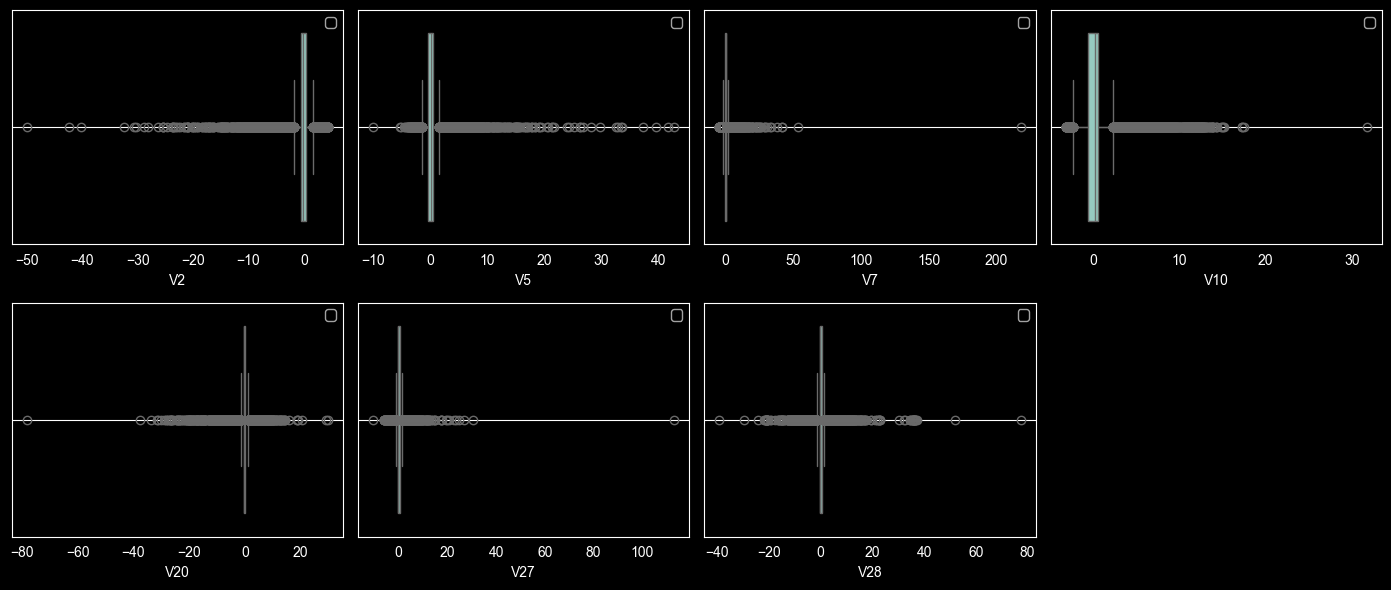

In [8]:
plt.figure(figsize=(14, 6))
k=1
for col in out:
    plt.subplot(2, 4, k)
    sns.boxplot(data= df, x=col, orient='v')
    plt.xlabel(col)
    plt.grid()
    plt.legend()
    k = k+1
plt.tight_layout()
plt.show()


In [9]:
iqr(df,out)

The V2 : 43620 outliers ou 7.6710690607249 % outliers
depois: 
The V2 : 43620 outliers or 7.6710690607249 % outliers
--------------------------------------------------------------------
The V5 : 71015 outliers ou 12.488788843360357 % outliers
depois: 
The V5 : 71015 outliers or 12.488788843360357 % outliers
--------------------------------------------------------------------
The V7 : 55997 outliers ou 9.847704130981482 % outliers
depois: 
The V7 : 55997 outliers or 9.847704130981482 % outliers
--------------------------------------------------------------------
The V10 : 10710 outliers ou 1.883474315459965 % outliers
depois: 
The V10 : 10710 outliers or 1.883474315459965 % outliers
--------------------------------------------------------------------
The V20 : 65708 outliers ou 11.555493027100223 % outliers
depois: 
The V20 : 65708 outliers or 11.555493027100223 % outliers
--------------------------------------------------------------------
The V27 : 82235 outliers ou 14.461952411937466

C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jairo\AppData\Local\Temp\ipykernel_12972\36186290.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jairo\AppData\Local\Temp\ipykernel_12972\36186290.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\jairo\PycharmProjects\laciq\.venv\Lib\site-packages\seaborn\_base.py:

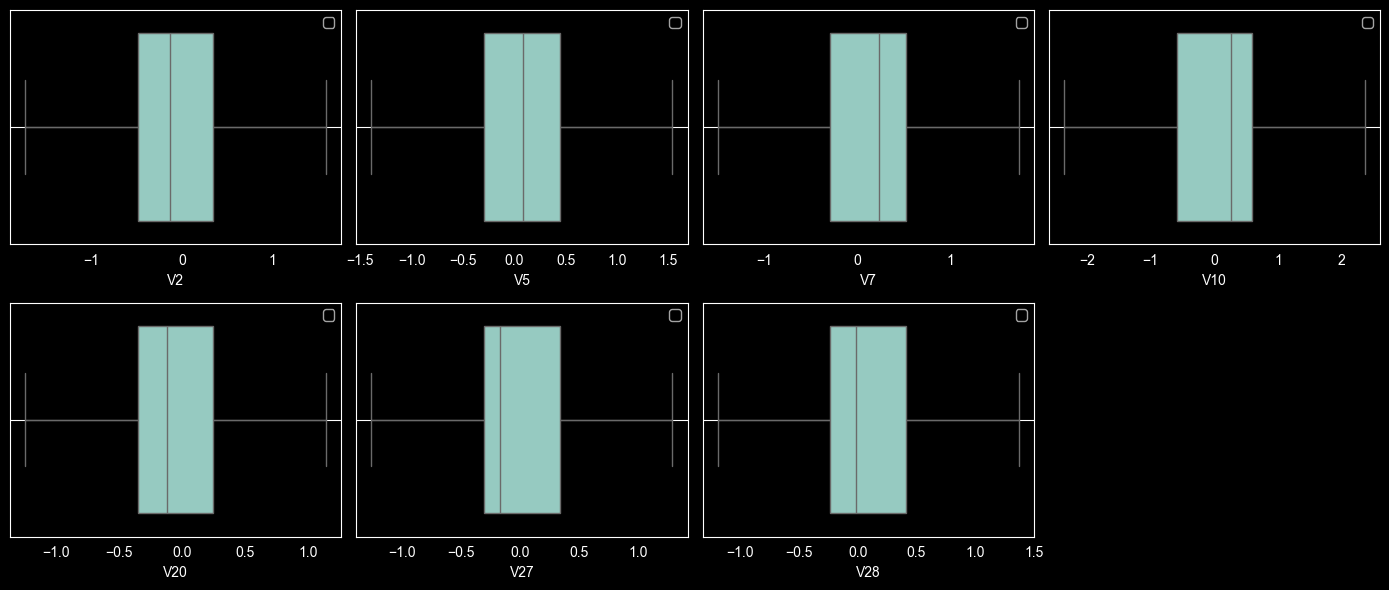

In [10]:
plt.figure(figsize=(14, 6))
k=1
for col in out:
    plt.subplot(2, 4, k)
    sns.boxplot(data= df, x=col, orient='v')
    plt.xlabel(col)
    plt.grid()
    plt.legend()
    k = k+1
plt.tight_layout()
plt.show()

In [21]:
y = df['Class'].values
X = df.drop("Class", axis=1)

In [22]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    shuffle=True
)

In [26]:
y_test.head()

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


In [20]:
X_train.to_csv("Data/balanceado/X_train.csv")
y_train.to_csv("Data/balanceado/y_train.csv")

In [21]:
X_test.to_csv("Data/balanceado/X_test.csv")
y_test.to_csv("Data/balanceado/y_test.csv")